In [4]:
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt


In [5]:
#Read the data 
data = pd.read_csv("internal.csv", header=0,
                   index_col=0, parse_dates=True, squeeze=True)

C:\Users\offic\AppData\Local\Temp\ipykernel_5544\1630845971.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv("internal.csv", header=0,


In [6]:
data.head()

,eps,pe
Date,,
2000-01-01,0.31,20.77
2001-01-01,0.36,19.73
2002-01-01,0.44,17.41
2003-01-01,0.54,15.99
2004-01-01,0.64,15.38


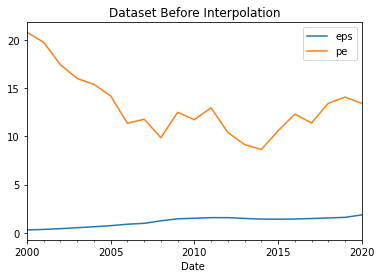

In [7]:
#Orginal Dataset
data.plot()
plt.title("Dataset Before Interpolation")
plt.show()

In [8]:
# Use resample function to upsample months 
# to days using the mean sales of month
upsampled = data.resample('D').mean()

In [9]:
upsampled

,eps,pe
Date,,
2000-01-01,0.31,20.77
2000-01-02,NaN,NaN
2000-01-03,NaN,NaN
2000-01-04,NaN,NaN
2000-01-05,NaN,NaN
...,...,...
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN
2019-12-30,NaN,NaN


In [10]:
df=upsampled.interpolate(method='spline', order=2)


In [11]:
df.head()

,eps,pe
Date,,
2000-01-01,0.310000,20.770000
2000-01-02,0.188723,21.050533
2000-01-03,0.189153,21.045239
2000-01-04,0.189583,21.039946
2000-01-05,0.190012,21.034654


In [12]:
#Writing a Pandas DataFrame to CSV file
df.to_csv('interpolated-internal.csv')

